In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importing required packages

In [2]:
n=10
returns=np.zeros((n,10)) # creating an array of size (n x 10) with all values ZERO
assets=np.zeros((n,10)) # creating another array that will be related to returns array above
r_1=np.random.normal(1.01,0.03,10) # creating 10 random numbers with mean 1.01 and a std dev of 0.03 for checking purpose
returns[0]=r_1#replacing first row of zeros with the one above. Useful to understand what is happening in this whole excercise
assets[0]=np.cumprod(r_1)

In [3]:
for i in range(1,n): # a for loop to completely fill returns and assets arrays. 
    r_i=r_1+np.random.normal(0.001,.02,10) # same as above but we will use this in the calculations later
    returns[i]=r_i # will loop through 10 times and fill all rows and columns in returns array
    assets[i]=np.cumprod(r_i) # to fillrelated values in the asset array

In [4]:
mean_ret=[(np.mean(r) - 1)*100 for r in returns] # calculating the mean return using the mean function in numpy through a list 
mean_ret # comprehension. The result will be a (10 x 1) array, one mean for each row. DONT forget to reduce one in the formula

[-0.27043537494281233,
 0.22787072243626305,
 -1.5663449542471453,
 -0.28043156062868,
 0.16541448763955913,
 -0.9753861318344881,
 -0.6359931068218194,
 -1.115615351684629,
 -1.2290635843756226,
 -1.1047185382455416]

In [5]:
ret_vol = [np.std(r) for r in returns] # calculating std dev of returns using the np.std function in numpy through a list
ret_vol # comprehension

[0.03440105868314278,
 0.030830903623118834,
 0.03178433045505207,
 0.024677354339182486,
 0.0345735976676144,
 0.045307686450604144,
 0.03973774943473922,
 0.043750742106178096,
 0.040834230419105146,
 0.046993943528328544]

Text(0,0.5,'returns')

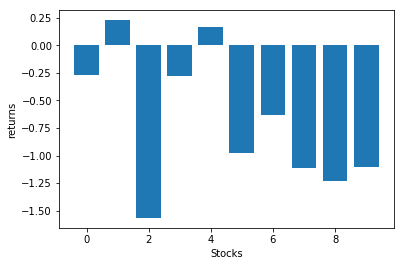

In [6]:
plt.bar(np.arange(len(mean_ret)),mean_ret)# syntax for bar graph. The first argument represents the number of bars required. The 
plt.xlabel('Stocks')# np.arange function arranges numbers in ascending order. Here the length of array mean_ret is 10 and hence
plt.ylabel('returns') # see 0 to ten on x-axis

In [7]:
weights=np.random.uniform(0,1,n) # since we will be calculating the std devistion of the portfolio we will need weights. We 
weights=weights/np.sum(weights)# first create a random numpy array and use formula to calculate weights

In [8]:
exp_ret=np.dot(weights,mean_ret) #np.dot multiplies two matrices that are in (m x n)&(n x o). We multiply weights with returns
exp_ret # to get the expected return. 

-0.8274260253337347

In [9]:
cov_mat=np.cov(returns) # using the covariance funtion in numpy. Since the original matrix is (10 x 10) the resulting matrix
# is (10 x 10)

array([[0.00131493, 0.00101851, 0.00108942, 0.0006926 , 0.00104921,
        0.00136464, 0.0014499 , 0.00148545, 0.00120141, 0.00161314],
       [0.00101851, 0.00105616, 0.00080939, 0.00043458, 0.00052658,
        0.00082676, 0.00113697, 0.00137182, 0.00087033, 0.00113553],
       [0.00108942, 0.00080939, 0.00112249, 0.00049867, 0.00090036,
        0.00123669, 0.00121811, 0.00125727, 0.00081344, 0.0013272 ],
       [0.0006926 , 0.00043458, 0.00049867, 0.00067664, 0.00053567,
        0.00078888, 0.00068999, 0.00061306, 0.00092576, 0.00107824],
       [0.00104921, 0.00052658, 0.00090036, 0.00053567, 0.00132815,
        0.00127762, 0.00116277, 0.00102066, 0.0008786 , 0.00121058],
       [0.00136464, 0.00082676, 0.00123669, 0.00078888, 0.00127762,
        0.00228087, 0.00152377, 0.00133943, 0.00101822, 0.00182639],
       [0.0014499 , 0.00113697, 0.00121811, 0.00068999, 0.00116277,
        0.00152377, 0.00175454, 0.0018095 , 0.00104974, 0.00183552],
       [0.00148545, 0.00137182, 0.0012572

In [12]:
pf_var=np.dot(np.dot(weights,cov_mat),weights.T) # calculating portfolio variance using np.dot. Np.dot is useful in multiplying 
# two matrices. An understanding of the formula to calculate portfolio variance is required. Also, rules for matrix multiplication
# should be through

In [13]:
pf_var # printing results

0.0012012753711184482

In [15]:
pf_std=np.sqrt(pf_var) # Since std dev is square root of variance. We use built-in square root function in numpy
pf_std

0.03465941965928524